# WeatherPy
----

Builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude


In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [97]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q=' 

# set up lists to hold reponse info
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# count the number of records processed
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    # Check to see if the response was good before processing record
    if response['cod'] == 200:
        print(f'Processing record {counter} | {city}')
        cities_found.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        # increment the counter
        counter += 1
    # Skip city if response is bad
    else: 
        print(f'City not found. Skipping...')
        

City not found. Skipping...
Processing record 1 | butaritari
Processing record 2 | paita
Processing record 3 | castro
Processing record 4 | ribeira grande
Processing record 5 | harwich
Processing record 6 | mar del plata
Processing record 7 | luena
Processing record 8 | salalah
Processing record 9 | ushuaia
Processing record 10 | soyo
City not found. Skipping...
Processing record 11 | ahipara
Processing record 12 | luganville
Processing record 13 | puerto ayora
Processing record 14 | guerrero negro
Processing record 15 | norman wells
Processing record 16 | albany
Processing record 17 | timra
Processing record 18 | punta arenas
Processing record 19 | ashcroft
Processing record 20 | rikitea
Processing record 21 | port elizabeth
Processing record 22 | cap malheureux
Processing record 23 | chalus
Processing record 24 | nikolskoye
Processing record 25 | thompson
Processing record 26 | brae
Processing record 27 | zhigansk
Processing record 28 | usinsk
Processing record 29 | safaga
Processing

Processing record 228 | seoul
Processing record 229 | governador valadares
Processing record 230 | aku
Processing record 231 | kroya
Processing record 232 | padang
Processing record 233 | shergarh
Processing record 234 | cochrane
Processing record 235 | kendal
Processing record 236 | shelburne
Processing record 237 | marzuq
City not found. Skipping...
Processing record 238 | pittsburg
Processing record 239 | richards bay
City not found. Skipping...
Processing record 240 | vestmanna
Processing record 241 | husavik
Processing record 242 | pangody
Processing record 243 | iquitos
City not found. Skipping...
Processing record 244 | geraldton
Processing record 245 | labuhan
Processing record 246 | lolodorf
Processing record 247 | ardesen
Processing record 248 | bani
Processing record 249 | okha
Processing record 250 | inhambane
Processing record 251 | ranfurly
Processing record 252 | fairbanks
Processing record 253 | kudahuvadhoo
Processing record 254 | naze
Processing record 255 | gwadar
Pr

Processing record 457 | floro
Processing record 458 | agen
Processing record 459 | anloga
Processing record 460 | hobyo
Processing record 461 | salta
Processing record 462 | namie
Processing record 463 | san quintin
Processing record 464 | nenjiang
City not found. Skipping...
Processing record 465 | mandali
Processing record 466 | kiunga
Processing record 467 | gasa
Processing record 468 | port moresby
Processing record 469 | qasigiannguit
Processing record 470 | mananjary
Processing record 471 | concepcion del uruguay
Processing record 472 | gusau
Processing record 473 | belawan
Processing record 474 | sechura
Processing record 475 | gerash
Processing record 476 | dunedin
Processing record 477 | caravelas
Processing record 478 | cacu
Processing record 479 | turayf
City not found. Skipping...
Processing record 480 | avera
Processing record 481 | sinjai
Processing record 482 | wundanyi
City not found. Skipping...
Processing record 483 | solon
Processing record 484 | lavrentiya
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [144]:
weather_dict = {
    'City':cities_found, 'Cloudiness':cloudiness, 'Country':country, 'Date':date, 'Humidity':humidity,
    'Lat':lat, 'Lng':lng, 'Max Temp':max_temp, 'Wind Speed':wind_speed 
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index_label='City_ID')
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,0,KI,1582083532,77,3.07,172.79,83.79,18.50
1,Paita,1,PE,1582083532,67,-5.09,-81.11,78.08,9.75
2,Castro,100,BR,1582083532,98,-24.79,-50.01,66.45,2.46
3,Ribeira Grande,33,PT,1582083532,87,38.52,-28.70,56.17,13.89
4,Harwich,0,GB,1582083201,77,51.94,1.28,39.99,14.99
...,...,...,...,...,...,...,...,...,...
537,Vozhega,99,RU,1582083679,97,60.47,40.22,33.84,10.38
538,Ust-Kuyga,99,RU,1582083679,97,70.02,135.60,-11.74,9.04
539,Calama,15,CL,1582083680,45,-22.47,-68.93,62.60,4.70
540,Lovozero,100,RU,1582083680,92,68.00,35.01,16.25,5.57


In [145]:
plot_date = pd.Timestamp(weather_data['Date'][0], unit='s', tz='US/Pacific')
plot_date

Timestamp('2020-02-18 19:38:52-0800', tz='US/Pacific')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

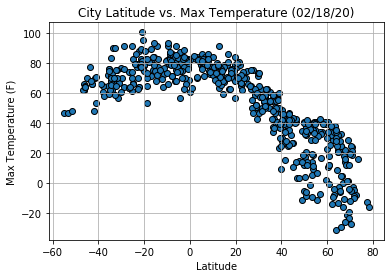

In [146]:
# Create a Scatter Plot for latitude vs. max temperature 
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid(axis='both')
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({plot_date:%m/%d/%y})')
plt.savefig('../output_data/plot1.png')
plt.show()

In the above plot, the correlation between Latitude and Max Temperature moves from positive to negative
once it passses the equator (Latitude = 0).

#### Latitude vs. Humidity Plot

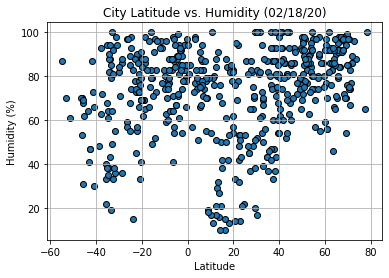

In [129]:
# Create a Scatter Plot for latitude vs. humidity 
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid(axis='both')
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({plot_date:%m/%d/%y})')
plt.savefig('../output_data/plot2.png')
plt.show()

The above plot looks like at the correlation between City Latitude and Humidity.

#### Latitude vs. Cloudiness Plot

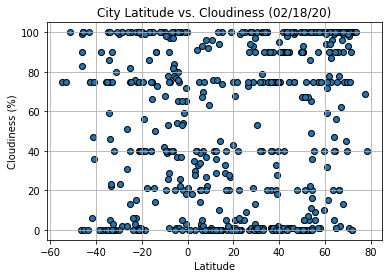

In [130]:
# Create a Scatter Plot for latitude vs. cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid(axis='both')
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({plot_date:%m/%d/%y})')
plt.savefig('../output_data/plot3.png')
plt.show()

The above plot looks at the correlation between City Latitude and Cloudiness. Without even doing any regression analysis and looking at the scatter plot, it shows no meaningful relationship.

#### Latitude vs. Wind Speed Plot

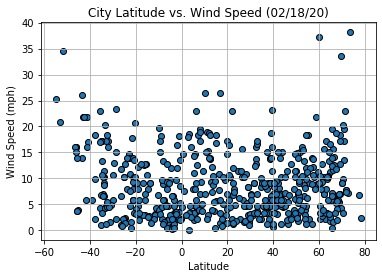

In [131]:
# Create a Scatter Plot for latitude vs. wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid(axis='both')
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({plot_date:%m/%d/%y})')
plt.savefig('../output_data/plot4.png')
plt.show()

The above plot shows the correlation between City Latitude and Wind Speed. The plot shows that wind speeds seem to be
clustered between 0 an 10 mph.

## Linear Regression

In [109]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather_data = weather_data[weather_data['Lat'] >= 0]
southern_weather_data = weather_data[weather_data['Lat'] < 0]
southern_weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Paita,1,PE,1582083532,67,-5.09,-81.11,78.08,9.75
2,Castro,100,BR,1582083532,98,-24.79,-50.01,66.45,2.46
5,Mar del Plata,0,AR,1582083516,93,-38.00,-57.56,61.00,2.24
6,Luena,100,AO,1582083533,96,-11.78,19.92,64.13,3.06
8,Ushuaia,75,AR,1582083373,87,-54.80,-68.30,46.40,25.28
...,...,...,...,...,...,...,...,...,...
526,Saldanha,0,ZA,1582083676,64,-33.01,17.94,69.80,1.12
530,Kandrian,82,PG,1582083677,64,-6.22,149.55,85.32,12.68
535,Alice Springs,0,AU,1582083609,15,-23.70,133.88,86.00,13.87
536,Cabedelo,40,BR,1582083679,88,-6.98,-34.83,78.80,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8800346914746008


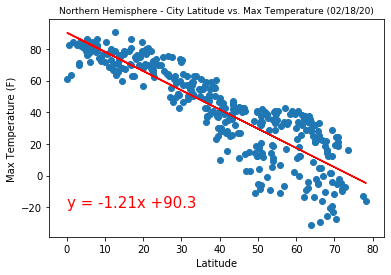

In [133]:
# Create a Scatter Plot for northern hemisphere - max temp vs. latitude 
x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Max Temp']
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Northern Hemisphere - City Latitude vs. Max Temperature ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot5.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

## Observable Trend 1
The above plot shows a strong negative correlation between City Latitude and Max Temperature in the northern
hemisphere. Temperatures rise as latitude decreases towards the equator. This model explains 88% of the variation in Max Temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5301165905300269


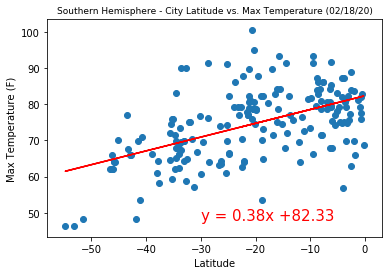

In [135]:
# Create a Scatter Plot for southern hemisphere - max temp vs. latitude 
x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Max Temp']
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(-30,48),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot6.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

## Observable Trend 2
The above plot shows a decent positive correlation between City Latitude and Max Temperature in the southern
hemisphere. Temperatures rise as latitude increases towards the equator. This model explains 53% of the variation in Max Temperature. Overall, looking at this plot and the one before (northern hemisphere), temperatures tend to increase as the location gets closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4012471281367994


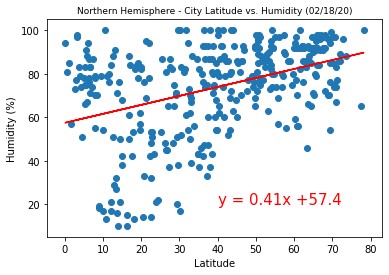

In [136]:
# Create a Scatter Plot for northern hemisphere - humidity vs. latitude 
x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Humidity']
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Humidity ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot7.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

## Observable Trend 3
The above plot shows a positive correlation between City Latitude and Humidity in the northern
hemisphere. Humidity somewhat tends to rise as latitude increases from the equator. This model explains 40% of the variation in Humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34724659035409045


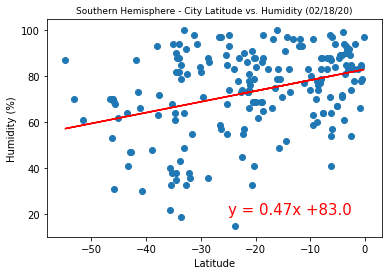

In [148]:
# Create a Scatter Plot for southern hemisphere - humidity vs. latitude 
x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Humidity']
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot8.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

The above plot shows a positive correlation between City Latitude and Humidity in the southern
hemisphere. Humidity somewhat tends to rise as latitude increases to the equator. This model explains 34.7% of the variation in Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3534387195621461


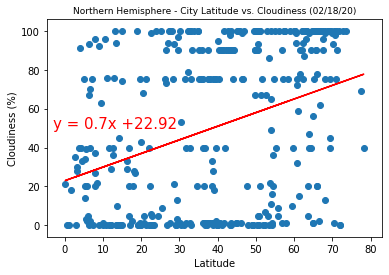

In [147]:
# Create a Scatter Plot for northern hemisphere - cloudiness vs. latitude 
x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(-3,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Cloudiness ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot9.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

The above plot shows a correlation between City Latitude and Humidity in the northern
hemisphere. From the given regression analysis and r-squared value not much is explained. A better
conclusion can be mabe by just inspecting the plot. Points are scattered all over the graph and
no real discernable correlation can be made.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11822470496175799


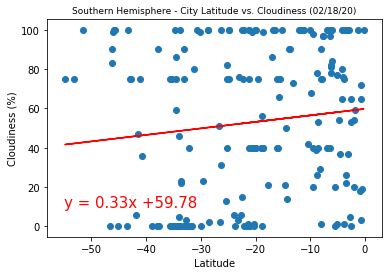

In [140]:
# Create a Scatter Plot for southern hemisphere - cloudiness vs. latitude 
x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot10.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

The above plot shows an insignificant positive correlation between City Latitude and Cloudiness in the southern hemisphere. As seen, the points are scattered throughout the graph with no meaningful correlation. As expected, this model explains only 11.8% of the variation in Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.053562556438070515


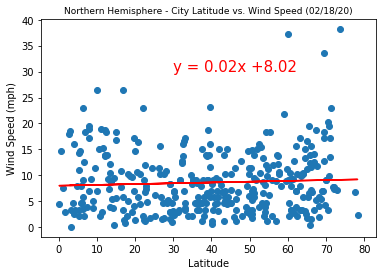

In [141]:
# Create a Scatter Plot for northern hemisphere - wind speed vs. latitude 
x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Wind Speed']
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.title(f'Northern Hemisphere - City Latitude vs. Wind Speed ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot11.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

The above plot shows the relationship between Latitude and Wind Speed (mph) in the northern hemisphere. This model only explains 5.4% of the variation in wind speed. As before, if anything, the plot shows that wind speeds seem to be clustered between 0 an 10 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4507996507630228


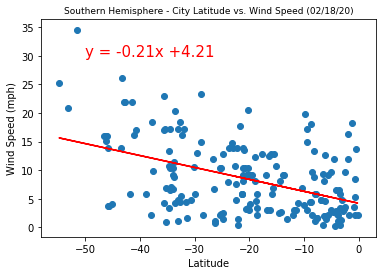

In [142]:
# Create a Scatter Plot for southern hemisphere - wind speed vs. latitude 
x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Wind Speed']
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Make the plot
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed ({plot_date:%m/%d/%y})',fontsize=9)
plt.savefig('../output_data/plot12.png')
# Print r square value
print(f"The r-squared is: {rvalue}")
# Show plot
plt.show()

The above plot shows a negative correlation between City Latitude and Wind Speed (mph) in the southern hemisphere. Wind Speed tends to decrease as latitude increases to the equator. This model explains 45.1% of the variation in Wind Speed.